In [ ]:
!pip install newspaper3k lxml[html_clean]


In [ ]:
import requests
from newspaper import Article

def google_search(query, api_key):
    params = {
        "engine": "google_news",
        "q": query,
        "api_key": api_key
    }

    response = requests.get("https://serpapi.com/search", params=params)

    if response.status_code == 200:
        results = response.json()
        news_results = results.get("news_results", [])

        if not news_results:
            print("No news results found.")
            return

        for idx, result in enumerate(news_results):
            print(f"Title: {result.get('title')}")
            print(f"Link: {result.get('link')}")
            print(f"Snippet: {result.get('snippet')}")
            print("-" * 50)
    else:
        print(f"Error: {response.status_code}, {response.text}")

def fetch_full_article_content(url):
    print("\n Fetching full article content...")
    try:
        article = Article(url)
        article.download()
        article.parse()

        print(f"Full Title: {article.title}")
        print(f"Full Content (first 2000 chars):\n{article.text[:2000]}")
        print("-" * 50)
    except Exception as e:
        print(f"Failed to fetch article content: {e}")

SERPAPI_KEY = "ea2279234bd0dd7a866534b804b183caa3356a512b6794056d65af237135e73b"
google_search("Kout Foods", SERPAPI_KEY)


Title: A tale of three cities Why parties should specify the governing law of their arbitration agreement
Link: https://www.nortonrosefulbright.com/en-gb/knowledge/publications/4eef7a95/a-tale-of-three-cities-why-parties-should-specify-the-governing-law-of-their-arbitration-agreement
Snippet: None
--------------------------------------------------
Title: Kabab-Ji SAL (Lebanon) v Kout Food Group (Kuwait): A palatable outcome
Link: https://www.wfw.com/articles/kabab-ji-sal-lebanon-v-kout-food-group-kuwait-a-palatable-outcome/
Snippet: None
--------------------------------------------------
Title: Subway® Announces an Exclusive Partnership with Kout Food Group in the State of Kuwait
Link: https://newsroom.subway.com/02-16-22-Subway-Announces-an-Exclusive-Partnership-with-Kout-Food-Group-in-the-State-of-Kuwait
Snippet: None
--------------------------------------------------
Title: Dine Brands International Continues Expansion with Dual-Brand Locations in the Middle East
Link: https://www.b

## GETTING FULL ARTICLE

In [ ]:
import requests
from newspaper import Article

SERPAPI_KEY = "ea2279234bd0dd7a866534b804b183caa3356a512b6794056d65af237135e73b"

query1 = "Kout Foods Pizza"
params = {
    "engine": "google_news",
    "q": query1,
    "api_key": SERPAPI_KEY
}

response = requests.get("https://serpapi.com/search", params=params)

if response.status_code == 200:
    results = response.json()
    news_results = results.get("news_results", [])

    if not news_results:
        print("No news results found.")
    else:
        for idx, result in enumerate(news_results):
            if idx == 0:
                print("\nFetching full article content...\n\n")
                try:
                    article = Article(result.get('link'))
                    article.download()
                    article.parse()

                    print(f"Full Title: {article.title} , \n \n")
                    print(article.text)
                except Exception as e:
                    print(f"Failed to fetch article content: {e}")
else:
    print(f"Error: {response.status_code}, {response.text}")



Fetching full article content...


Full Title: Pizza Hut opens first unit in Iraq , 
 

Pizza Hut has opened its first location in Iraq, in the Majidi Mall in Erbil, the capital of the Kurdistan region.

The 120-seat dine-in restaurant, operated by franchise partner Al Kout Food Company, is the first of five Pizza Huts planned to open in Erbil this year. Al Kout also plans to open a Pizza Hut in Sulaymaniyah, Iraq, the second-largest city in Kurdistan.

RELATED

• Pizza Hut tests interactive table for ordering, payment

• New Pizza Hut units feature pizza by the slice

• More international restaurant news

“We’re pleased to be able to bring Pizza Hut to Iraq as part of the explosive growth for our brand around the world,” Scott Bergren, chief executive of Pizza Hut, said in a statement. “While Pizza Hut’s footprint is already significantly larger than our nearest competitor, we’ve still just scratched the surface of global growth.”

Pizza Hut’s parent company, Louisville, Ky.-based Yu

In [ ]:
import requests

def fetch_google_reviews(api_key):
    params = {
        "engine": "google_maps",
        "q": "Burger King",
        "api_key": api_key,
        "type": "search"
    }

    response = requests.get("https://serpapi.com/search", params=params)

    if response.status_code == 200:
        results = response.json()
        place_results = results.get("local_results", [])

        if not place_results:
            print("No local results found.")
            return

        place = place_results[0]
        place_id = place.get("place_id")

        if not place_id:
            print("Place ID not found in results.")
            return

        # Fetch reviews
        details_params = {
            "engine": "google_maps_reviews",
            "place_id": place_id,
            "api_key": api_key
        }

        details_response = requests.get("https://serpapi.com/search", params=details_params)

        if details_response.status_code == 200:
            details = details_response.json()
            reviews = details.get("reviews", [])

            if not reviews:
                print("No reviews found.")
                return

            for review in reviews:
                author = review.get("author") or (review.get("user", {}).get("name"))
                text = review.get("text") or review.get("snippet")
                rating = review.get("rating")
                date = review.get("date")

                print(f"Author: {author}")
                print(f"Rating: {rating}")
                print(f"Review: {text}")
                print(f"Time: {date}")
                print("-" * 50)
        else:
            print(f"Error fetching reviews: {details_response.status_code}, {details_response.text}")
    else:
        print(f"Error fetching place: {response.status_code}, {response.text}")

SERPAPI_KEY = "6617a58eaa9d4d7aa32e395b5e5289b8f02ea55e05a698982c6c93b7ab370b79"
fetch_google_reviews(SERPAPI_KEY)


Author: James Woods
Rating: 1.0
Review: Girl behind the counter stuck her finger in her mouth and churned it around in an attempt to dislodge a tonsil giblet to my best guess.  She then proceeded to handle my food.  I really was hungry but also torn to fuss and possibly get pushback from their obvious unprofessional attitude or just tolerate it and deal with their tonsil gravy on my burger wrapper.  I picked the wrapper off like i had a pair of tweezers playing operation, trying my best to not to touch a contaminated spot on the wrapper.  I should have just walked out or got a refund…if they even do a refund.  Sad experience.  What a busted sorrily ran place.
Time: a week ago
--------------------------------------------------
Author: Victoria Baysinger
Rating: 2.0
Review: Waited 40 minutes for food only to be told they were out of some things and had to substitute. Did not tell us they were out of apple juice for the kids meal, just didn't give us any. The cashier was polite and apolog

In [1]:
import requests
import pandas as pd
import time

def fetch_all_burgerking_reviews(api_key):
    # Step 1: Search to get place_id
    search_params = {
        "engine": "google_maps",
        "q": "Semma, 60 Greenwich Ave, New York, NY 10011, United States",
        "api_key": api_key
    }
    search_resp = requests.get("https://serpapi.com/search", params=search_params)
    search_resp.raise_for_status()
    data = search_resp.json()

    place = data.get("place_results")
    if not place or not place.get("place_id"):
        raise ValueError("Could not find place_id for that location.")

    place_id = place["place_id"]
    print(f"Found place_id: {place_id}")

    # Step 2: Fetch all reviews with pagination
    next_token = None
    reviews = []
    i=0

    while i < 5 :
        params = {
            "engine": "google_maps_reviews",
            "place_id": place_id,
            "api_key": api_key,

        }
        if next_token:
            params["next_page_token"] = next_token

        resp = requests.get("https://serpapi.com/search", params=params)
        resp.raise_for_status()
        page = resp.json()

        for r in page.get("reviews", []):
            reviews.append({
                "author": r.get("author") or r.get("user", {}).get("name"),
                "rating": r.get("rating"),
                "review": r.get("text") or r.get("snippet"),
                "date": r.get("date")
            })

        next_token = page['serpapi_pagination']['next_page_token'] if 'serpapi_pagination' in page else None

        if not next_token:
          print("No more pages to fetch.")
          break
        time.sleep(2)  # avoid being blocked/paced
        i=i+1
    df = pd.DataFrame(reviews)
    return place_id, df, page

# Usage:
SERPAPI_KEY = "6617a58eaa9d4d7aa32e395b5e5289b8f02ea55e05a698982c6c93b7ab370b79"
place_id, df_reviews, page = fetch_all_burgerking_reviews(SERPAPI_KEY)
df_reviews
# df_reviews.to_csv("bk_327w42_reviews.csv", index=False)


Found place_id: ChIJxZmzO7hZwokRx2fls4uU4YU


,author,rating,review,date
0,Paul,5.0,"Semma is SEMMA!!!! ♥️\nCozy place , excellent ...",2 weeks ago
1,Abhi,5.0,Semma is an absolute gem and a must-visit in N...,2 weeks ago
2,Kabby Hong,5.0,Semma redefines what Indian food is to me with...,2 weeks ago
3,Mary Sawyer,5.0,An amazing Indian food dining experience!! The...,2 months ago
4,Akshat Devrani,5.0,Absolutely loved everything about Semma! Excel...,2 months ago
5,Adarsh,5.0,Food: We went with a fully vegetarian meal and...,2 months ago
6,Sushama,5.0,Semma is an absolute gem among Indian restaura...,2 weeks ago
7,veena rangaswami,5.0,Worth the hype and so much more. Each time I e...,6 days ago
8,Deepika Ganesh,5.0,I have dined twice at Semma!! Had a great expe...,3 months ago
9,Jovanni Romero,5.0,Charming spot that draws you in on aesthetics ...,2 months ago


In [5]:
df_processed=df_reviews[df_reviews['review'].str.contains('North|South')]
df_processed

,author,rating,review,date
1,Abhi,5.0,Semma is an absolute gem and a must-visit in N...,2 weeks ago
5,Adarsh,5.0,Food: We went with a fully vegetarian meal and...,2 months ago
6,Sushama,5.0,Semma is an absolute gem among Indian restaura...,2 weeks ago
8,Deepika Ganesh,5.0,I have dined twice at Semma!! Had a great expe...,3 months ago
15,Yiyi Zhang,5.0,I don't think I was quite prepared for how goo...,a month ago
23,Divya Vartak,5.0,South Indian restaurant with Michelin star. ...,5 days ago
24,Gokul Kalla,5.0,Coming from a South Indian I was initially ske...,4 months ago
27,Nagarajan R,1.0,Highly overrated restaurant. I had dinner at S...,2 months ago
30,N P,5.0,"Compliments to the Chef on this culinary gem, ...",5 months ago
32,Reema Mulchandani,5.0,"Semma is an absolute gem, and our dining exper...",5 months ago


In [7]:
from google import genai
client = genai.Client(api_key=)


In [15]:
df_processed=df_reviews[df_reviews['review'].str.contains('North|South')]
df_processed

,author,rating,review,date
1,Abhi,5.0,Semma is an absolute gem and a must-visit in N...,2 weeks ago
5,Adarsh,5.0,Food: We went with a fully vegetarian meal and...,2 months ago
6,Sushama,5.0,Semma is an absolute gem among Indian restaura...,2 weeks ago
8,Deepika Ganesh,5.0,I have dined twice at Semma!! Had a great expe...,3 months ago
15,Yiyi Zhang,5.0,I don't think I was quite prepared for how goo...,a month ago
23,Divya Vartak,5.0,South Indian restaurant with Michelin star. ...,5 days ago
24,Gokul Kalla,5.0,Coming from a South Indian I was initially ske...,4 months ago
27,Nagarajan R,1.0,Highly overrated restaurant. I had dinner at S...,2 months ago
30,N P,5.0,"Compliments to the Chef on this culinary gem, ...",5 months ago
32,Reema Mulchandani,5.0,"Semma is an absolute gem, and our dining exper...",5 months ago


## LLM Enrichment : North South Food Item Sentiments

In [18]:
l = []
for index, row in df_processed.iterrows():
    text = row['review']
    prompt = (
        "You are a text processor. You will read the review text passed. "
        "You will assess if the review talks of South Indian or North Indian food. "
        "Then you will assess the sentiment for both cuisines. "
        "You will return a single response of the structure: "
        "North : Positive/Negative/Absent, South : Positive/Negative/Absent. "
        "The positive or negative flag will depend on your assessment. "
        f"Here is the review: {text}"
    )

    response = client.models.generate_content(
        model="gemini-2.5-flash",
        contents=[{"role": "user", "parts": [{"text": prompt}]}]
    )

    # Extract text safely depending on API response format
    l.append(response.text)

df_processed['sentiment'] = l
df_processed


/tmp/ipython-input-18-3064594108.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['sentiment'] = l


,author,rating,review,date,sentiment
1,Abhi,5.0,Semma is an absolute gem and a must-visit in N...,2 weeks ago,"North : Absent, South : Positive"
5,Adarsh,5.0,Food: We went with a fully vegetarian meal and...,2 months ago,"North : Absent, South : Positive"
6,Sushama,5.0,Semma is an absolute gem among Indian restaura...,2 weeks ago,"North : Absent, South : Positive"
8,Deepika Ganesh,5.0,I have dined twice at Semma!! Had a great expe...,3 months ago,"North : Absent, South : Positive"
15,Yiyi Zhang,5.0,I don't think I was quite prepared for how goo...,a month ago,"North : Absent, South : Positive"
23,Divya Vartak,5.0,South Indian restaurant with Michelin star. ...,5 days ago,"North : Absent, South : Positive"
24,Gokul Kalla,5.0,Coming from a South Indian I was initially ske...,4 months ago,"North : Absent, South : Positive"
27,Nagarajan R,1.0,Highly overrated restaurant. I had dinner at S...,2 months ago,"North : Absent, South : Negative"
30,N P,5.0,"Compliments to the Chef on this culinary gem, ...",5 months ago,"North : Absent, South : Positive"
32,Reema Mulchandani,5.0,"Semma is an absolute gem, and our dining exper...",5 months ago,"North : Positive, South : Positive"


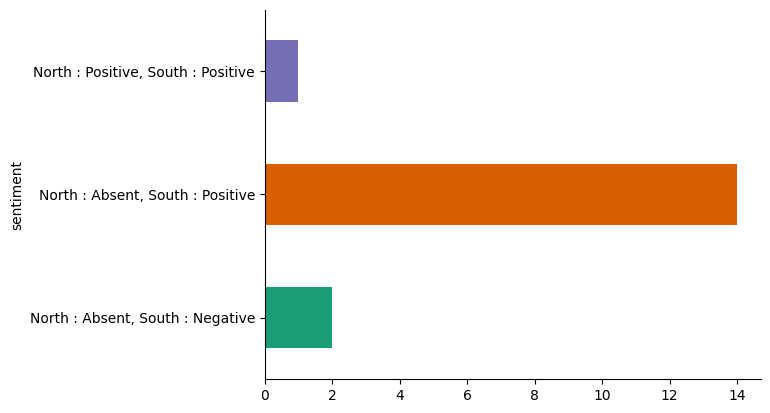

In [19]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_processed.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## LLM Enrichment #2 Food items

In [27]:
l = []
for index, row in df_processed.head(5).iterrows():
    text = row['review']
    prompt = (
        "You are a text processor. You will read the review text passed. "
        "You will assess if the review talks of Food dishes. "
        "Then you will assess the sentiment for the dish. "
        "You will return a single response of the structure for as many food items you identify: "
        "Food Item [placeholder for name]: Positive/Negative"
        "If the review does not mention any food dishes flag it as No dish mentioned"
        "The positive or negative flag will depend on your assessment. "
        f"Here is the review: {text}"
    )

    response = client.models.generate_content(
        model="gemini-1.5-flash",
        contents=[{"role": "user", "parts": [{"text": prompt}]}]
    )

    # Extract text safely depending on API response format
    l.append(response.text)
df_processed_short=df_processed[:5]
df_processed_short['food_items'] = l


/tmp/ipython-input-27-1801302083.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_short['food_items'] = l


In [28]:
df_processed_short[['sentiment','food_items']]

,sentiment,food_items
1,"North : Absent, South : Positive",No dish mentioned\n
5,"North : Absent, South : Positive",Paniyaram: Positive\nGunpowder dosa: Positive\...
6,"North : Absent, South : Positive",No dish mentioned\n
8,"North : Absent, South : Positive",Tiger prawns: Positive\nGhee roast lamb: Posit...
15,"North : Absent, South : Positive",Sprouted mung beans: Positive\nOxtail: Positiv...
